<a href="https://colab.research.google.com/github/philjaycee/javaag_1/blob/main/uas_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df_yield = pd.read_csv('produktivitas_komoditas_compile_fix.csv')
df_yield.head(20)


,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu
0,BANTEN,Jagung,1997,0.0,87.402258,9.029355,25.262903
1,BANTEN,Kacang Hijau,1997,0.0,84.525806,4.444516,26.269677
2,BANTEN,Kacang Tanah,1997,0.0,84.624516,6.178065,26.580000
3,BANTEN,Padi,1997,0.0,77.869032,0.349032,25.261290
4,BANTEN,Ubi Jalar,1997,0.0,74.951290,0.299677,25.473548
5,BANTEN,Ubi Kayu,1997,0.0,68.156667,0.233667,26.690000
6,BANTEN,Jagung,1998,0.0,65.576774,0.521290,27.969677
7,BANTEN,Kacang Hijau,1998,0.0,80.623871,6.495161,27.372903
8,BANTEN,Kacang Tanah,1998,0.0,86.946452,8.580645,26.939032
9,BANTEN,Padi,1998,0.0,85.934194,7.292903,27.405484


File csv di merge menggunakan notebook yang lain dan di print (cetak)

In [ ]:
df_yield.tail()

,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu
680,JAWA TIMUR,Kacang Hijau,2015,12.07,59.050968,0.004194,27.409677
681,JAWA TIMUR,Kacang Tanah,2015,13.73,55.447000,0.029333,28.772333
682,JAWA TIMUR,Padi,2015,61.13,60.052903,1.374194,29.809355
683,JAWA TIMUR,Ubi Jalar,2015,274.23,88.217097,15.854839,26.354194
684,JAWA TIMUR,Ubi Kayu,2015,215.39,84.320968,12.445161,27.097097


In [ ]:
#Dikelompokkan berdasarkan Ubi Kayu
df_yield1 = df_yield.rename(index=str, columns={"Produktivitas": 'Produktivitas_Jagung(Kuintal/Ha'})
df_yield1 = df_yield[df_yield['Komoditas'] == 'Ubi Kayu']
df_yield1.head()

,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu
5,BANTEN,Ubi Kayu,1997,0.0,68.156667,0.233667,26.690000
11,BANTEN,Ubi Kayu,1998,0.0,82.671935,3.669032,26.678065
17,BANTEN,Ubi Kayu,1999,0.0,80.269677,2.120968,25.503548
23,BANTEN,Ubi Kayu,2000,0.0,85.516774,4.863226,26.313871
29,BANTEN,Ubi Kayu,2001,132.0,87.501613,6.324516,25.805806


In [ ]:
#Dikelompokkan berdasarkan jagung
df_yield2 = df_yield.rename(index=str, columns={"Produktivitas": 'Produktivitas_(Kuintal/Ha'})
df_yield2 = df_yield[df_yield['Komoditas'] == 'Jagung']
df_yield2.head()

,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu
0,BANTEN,Jagung,1997,0.00,87.402258,9.029355,25.262903
6,BANTEN,Jagung,1998,0.00,65.576774,0.521290,27.969677
12,BANTEN,Jagung,1999,0.00,81.353333,3.149000,26.619000
18,BANTEN,Jagung,2000,0.00,76.711613,1.368387,25.667742
24,BANTEN,Jagung,2001,24.25,81.009677,2.810323,25.871935


In [ ]:
#Dikelompokkan berdasarkan padi
df_yield3 = df_yield.rename(index=str, columns={"Produktivitas": 'Produktivitas_(Kuintal/Ha'})
df_yield3 = df_yield[df_yield['Komoditas'] == 'Padi']
df_yield3.head()

,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu
3,BANTEN,Padi,1997,0.00,77.869032,0.349032,25.261290
9,BANTEN,Padi,1998,0.00,85.934194,7.292903,27.405484
15,BANTEN,Padi,1999,0.00,87.240000,3.319355,25.970000
21,BANTEN,Padi,2000,0.00,87.778710,7.206129,25.361613
27,BANTEN,Padi,2001,42.78,78.907419,3.214516,26.670000


In [ ]:
#Dikelompokkan berdasarkan Ubi Jalar
df_yield4 = df_yield.rename(index=str, columns={"Produktivitas": 'Produktivitas_(Kuintal/Ha'})
df_yield4 = df_yield[df_yield['Komoditas'] == 'Ubi Jalar']
df_yield4.head()

,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu
4,BANTEN,Ubi Jalar,1997,0.0,74.951290,0.299677,25.473548
10,BANTEN,Ubi Jalar,1998,0.0,86.553871,3.084516,26.429032
16,BANTEN,Ubi Jalar,1999,0.0,85.128065,3.563226,26.296129
22,BANTEN,Ubi Jalar,2000,0.0,87.588065,3.008710,25.454194
28,BANTEN,Ubi Jalar,2001,109.0,85.662258,7.459032,25.741613


In [ ]:
df_yield1.describe()

,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,2006.000000,146.751053,79.187819,4.154834,26.126648
std,5.501408,50.830998,7.411630,3.660627,1.367921
min,1997.000000,0.000000,54.159355,0.002333,22.473226
25%,2001.000000,127.000000,75.721129,1.055610,25.583871
50%,2006.000000,144.000000,80.640645,3.053548,26.368339
75%,2011.000000,172.237500,84.627500,6.334919,26.866855
max,2015.000000,259.650000,89.232258,13.332903,30.071290


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame 
from sklearn import linear_model 
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_regress = DataFrame(df_yield3,columns= ['Provinsi','Komoditas','Tahun','Produktivitas','Rata_Kelembapan','Rata_Presipitasi','rata_suhu'])
X = df_regress[['Tahun']]
y = df_regress[['Produktivitas']]

In [ ]:
# with sklearn 
regr= linear_model.LinearRegression()
regr.fit(X, y) 
print('Intercept: \n', regr.intercept_) 
print('Coefficients: \n', regr.coef_)

Intercept: 
 [-2042.77873684]
Coefficients: 
 [[1.0437807]]


In [ ]:
# prediction with sklearn 
Baru_Tahun = 2023
print ('Predicted Produktivitas: \n', regr.predict([[Baru_Tahun]]))

Predicted Produktivitas: 
 [[68.78962281]]


Dilakukan prediksi produktivitas padi pada tahun tersebut.

In [ ]:
# with statsmodels X = sm.add_constant(X)
model = sm.OLS(y, X).fit() 
predictions = model.predict(X) 
print_model= model.summary() 
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:          Produktivitas   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              2635.
Date:                Fri, 03 Jul 2020   Prob (F-statistic):                    3.81e-80
Time:                        12:36:41   Log-Likelihood:                         -430.62
No. Observations:                 114   AIC:                                      863.2
Df Residuals:                     113   BIC:                                      866.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(Text(0, 0.5, 'Produktivitas (Kuintal/Ha)'), Text(0.5, 0, 'Tahun'), Text(0.5, 1.0, 'Padi'))
(Text(0, 0.5, 'Produktivitas (Kuintal/Ha)'), Text(0.5, 0, 'Tahun'), Text(0.5, 1.0, 'Jagung'))
AxesSubplot(0.125,0.125;0.775x0.755)
(Text(0, 0.5, 'Produktivitas (Kuintal/Ha)'), Text(0.5, 0, 'Tahun'), Text(0.5, 1.0, 'Ubi Jalar'))


(None, None, None, None)

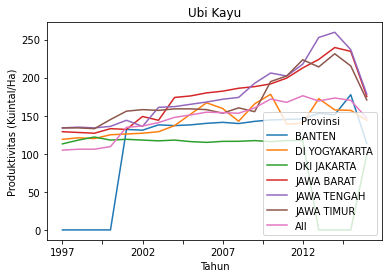

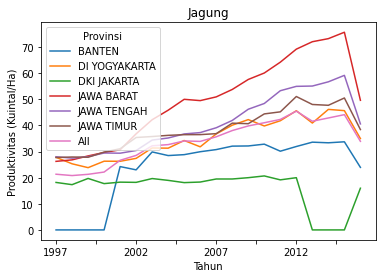

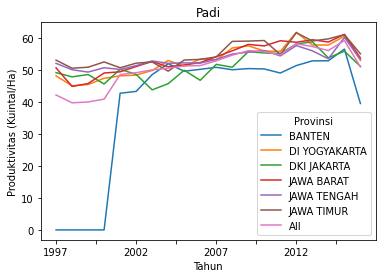

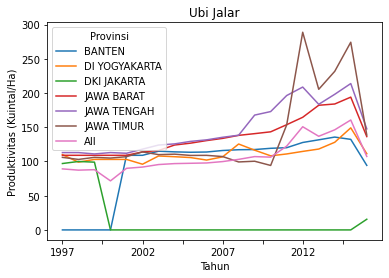

In [ ]:

df_yieldpivot = df_yield1.pivot_table(index = 'Tahun', columns= 'Provinsi' ,values = 'Produktivitas' ,margins = True ,  ).plot()
df_yieldpivot = plt.ylabel('Produktivitas (Kuintal/Ha)') , plt.xlabel('Tahun'), plt.title('Ubi Kayu')

df_yieldpivot1 = df_yield2.pivot_table(index = 'Tahun', columns= 'Provinsi' ,values = 'Produktivitas' ,margins = True, ).plot()
df_yieldpivot1 = plt.ylabel('Produktivitas (Kuintal/Ha)') , plt.xlabel('Tahun'), plt.title('Jagung')

df_yieldpivot2 = df_yield3.pivot_table(index = 'Tahun', columns= 'Provinsi' ,values = 'Produktivitas' ,margins = True).plot()
df_yieldplot2 = df_yieldpivot = plt.ylabel('Produktivitas (Kuintal/Ha)', ) , plt.xlabel('Tahun'), plt.title('Padi')

df_yieldpivot3 = df_yield4.pivot_table(index = 'Tahun', columns= 'Provinsi' ,values = 'Produktivitas' ,margins = True).plot()
df_yieldpivot3 = plt.ylabel('Produktivitas (Kuintal/Ha)') , plt.xlabel('Tahun'), plt.title('Ubi Jalar')

print(df_yieldpivot), print(df_yieldpivot1),print(df_yieldpivot2),print(df_yieldpivot3)

Di gambarkan plot pola produksi dari beberapa komoditas.

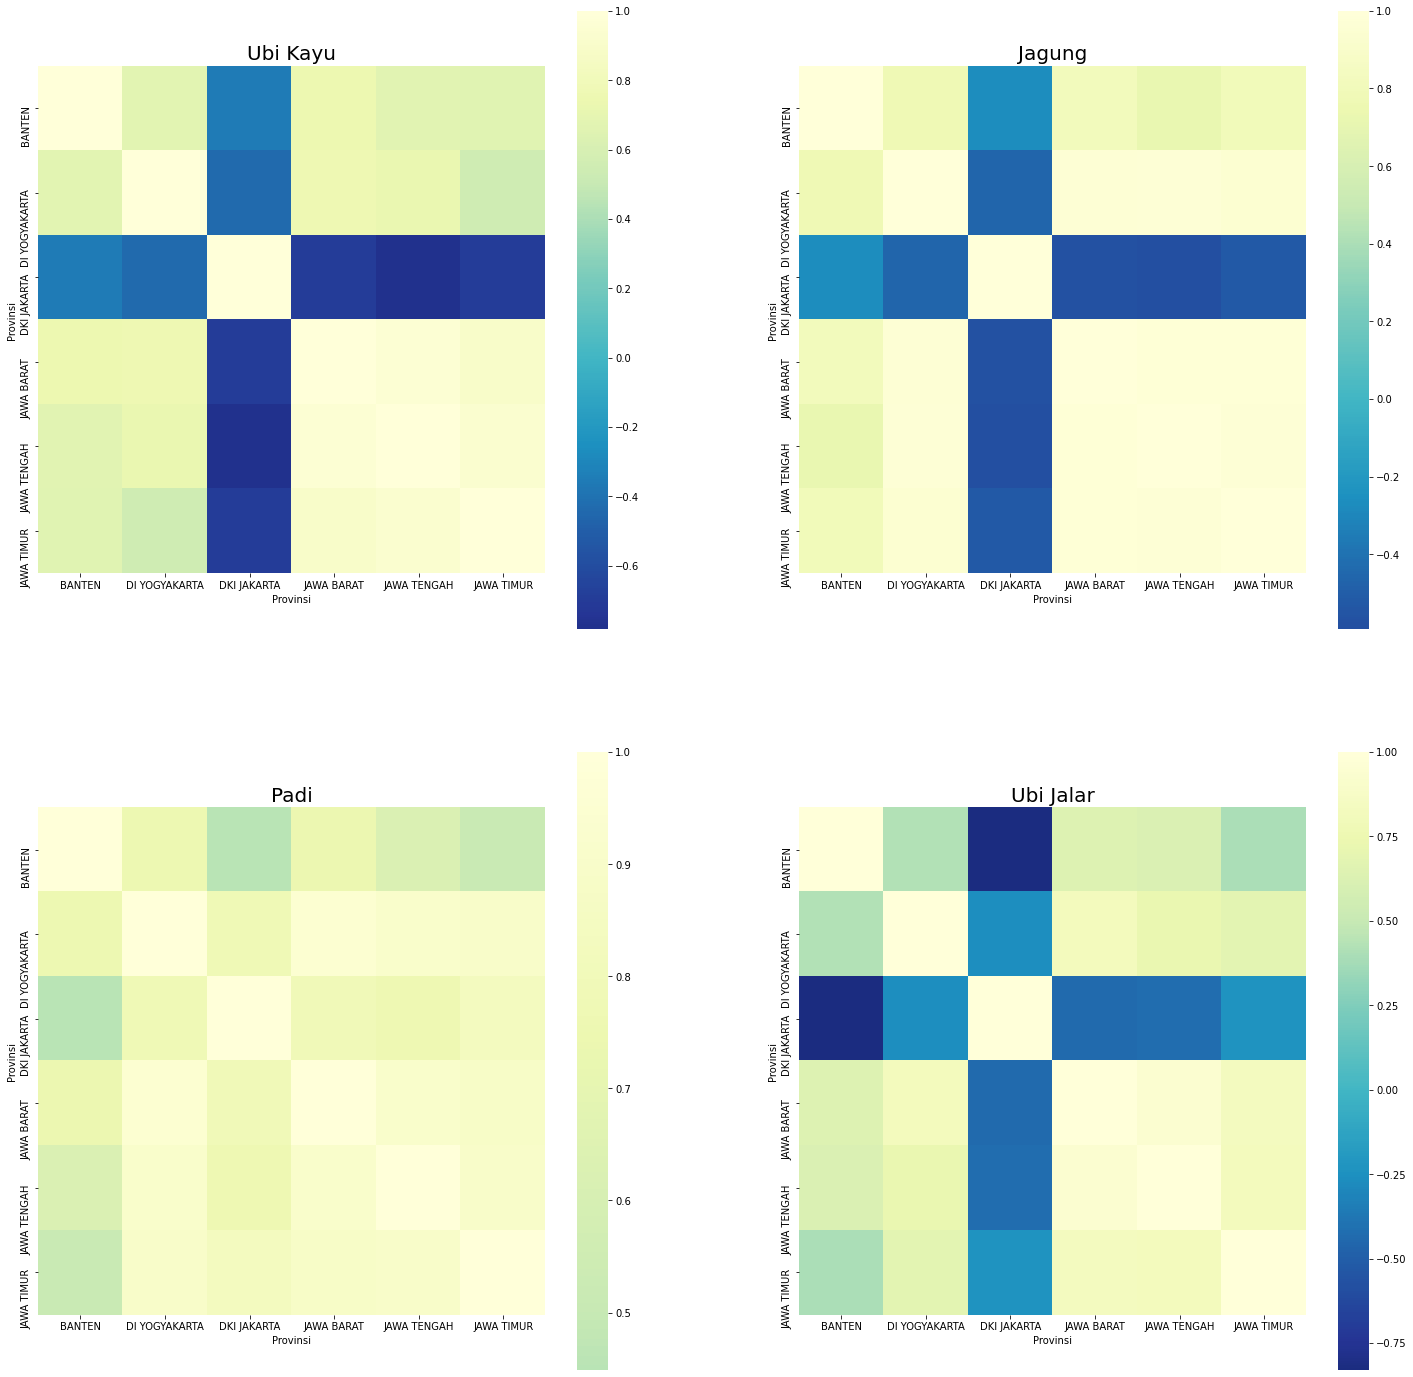

In [ ]:

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(25, 25))

df_yieldpivotcorr = df_yield1.pivot("Tahun","Provinsi","Produktivitas")
df_yieldpivotcorr = df_yieldpivotcorr.corr()
df_yieldpivotcorr = sns.heatmap(df_yieldpivotcorr, center = 0.0, cmap = "YlGnBu_r", ax= ax, square= True, fmt=".7f", cbar = True, )
df_yieldpivotcorr = ax.set_title("Ubi Kayu", fontsize = 20)

df_yieldpivotcorr1 = df_yield2.pivot("Tahun","Provinsi","Produktivitas")
df_yieldpivotcorr1 = df_yieldpivotcorr1.corr()
sns.heatmap(df_yieldpivotcorr1, center = 0.0, cmap = "YlGnBu_r", ax= ax2, square= True, fmt=".7f", cbar = True )
df_yieldpivotcorr1 = ax2.set_title("Jagung", fontsize = 20)

df_yieldpivotcorr2 = df_yield3.pivot("Tahun","Provinsi","Produktivitas")
df_yieldpivotcorr2 = df_yieldpivotcorr2.corr()
sns.heatmap(df_yieldpivotcorr2, center = 0.0, cmap = "YlGnBu_r" , ax= ax3, square= True, fmt=".7f", cbar = True  )
df_yieldpivotcorr2 = ax3.set_title("Padi", fontsize = 20)

df_yieldpivotcorr3 = df_yield4.pivot("Tahun","Provinsi","Produktivitas")
df_yieldpivotcorr3 = df_yieldpivotcorr3.corr()
sns.heatmap(df_yieldpivotcorr3, center = 0.0, cmap = "YlGnBu_r", ax= ax4 , square= True, fmt=".7f", cbar = True  )
df_yieldpivotcorr3 = ax4.set_title("Ubi Jalar", fontsize = 20)

Digambarkan korelasi antara satu provinsi dengan provinsi lain berdasarkan komoditas

In [ ]:
df_yield

,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu
0,BANTEN,Jagung,1997,0.00,87.402258,9.029355,25.262903
1,BANTEN,Kacang Hijau,1997,0.00,84.525806,4.444516,26.269677
2,BANTEN,Kacang Tanah,1997,0.00,84.624516,6.178065,26.580000
3,BANTEN,Padi,1997,0.00,77.869032,0.349032,25.261290
4,BANTEN,Ubi Jalar,1997,0.00,74.951290,0.299677,25.473548
...,...,...,...,...,...,...,...
680,JAWA TIMUR,Kacang Hijau,2015,12.07,59.050968,0.004194,27.409677
681,JAWA TIMUR,Kacang Tanah,2015,13.73,55.447000,0.029333,28.772333
682,JAWA TIMUR,Padi,2015,61.13,60.052903,1.374194,29.809355
683,JAWA TIMUR,Ubi Jalar,2015,274.23,88.217097,15.854839,26.354194


In [ ]:
# Merubah Data Kategorical menjadi Numerik
df_yield['Komoditass'] = pd.factorize(df_yield.Komoditas)[0]
df_yield['Provinsis'] = pd.factorize(df_yield.Provinsi)[0]
df_yield


,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Komoditass,Provinsis
0,BANTEN,Jagung,1997,0.00,87.402258,9.029355,25.262903,0,0
1,BANTEN,Kacang Hijau,1997,0.00,84.525806,4.444516,26.269677,1,0
2,BANTEN,Kacang Tanah,1997,0.00,84.624516,6.178065,26.580000,2,0
3,BANTEN,Padi,1997,0.00,77.869032,0.349032,25.261290,3,0
4,BANTEN,Ubi Jalar,1997,0.00,74.951290,0.299677,25.473548,4,0
...,...,...,...,...,...,...,...,...,...
680,JAWA TIMUR,Kacang Hijau,2015,12.07,59.050968,0.004194,27.409677,1,5
681,JAWA TIMUR,Kacang Tanah,2015,13.73,55.447000,0.029333,28.772333,2,5
682,JAWA TIMUR,Padi,2015,61.13,60.052903,1.374194,29.809355,3,5
683,JAWA TIMUR,Ubi Jalar,2015,274.23,88.217097,15.854839,26.354194,4,5


[Text(1364.6739130434783, 1359.0, 'Produktivitas <= 84.94\nentropy = 2.597\nsamples = 685\nvalue = [114, 114, 114, 114, 114, 114, 1]'),
 Text(808.695652173913, 1057.0, 'Produktivitas <= 17.09\nentropy = 2.262\nsamples = 484\nvalue = [114, 114, 114, 114, 20, 7, 1]'),
 Text(404.3478260869565, 755.0, 'Produktivitas <= 1.96\nentropy = 1.727\nsamples = 266\nvalue = [7, 114, 113, 4, 20, 7, 1]'),
 Text(202.17391304347825, 453.0, 'Provinsis <= 1.0\nentropy = 2.378\nsamples = 69\nvalue = [7, 23, 7, 4, 20, 7, 1]'),
 Text(101.08695652173913, 151.0, 'entropy = 2.585\nsamples = 24\nvalue = [4, 4, 4, 4, 4, 4, 0]'),
 Text(303.2608695652174, 151.0, 'entropy = 1.959\nsamples = 45\nvalue = [3, 19, 3, 0, 16, 3, 1]'),
 Text(606.5217391304348, 453.0, 'Produktivitas <= 9.44\nentropy = 0.996\nsamples = 197\nvalue = [0, 91, 106, 0, 0, 0, 0]'),
 Text(505.4347826086956, 151.0, 'entropy = 0.497\nsamples = 55\nvalue = [0, 49, 6, 0, 0, 0, 0]'),
 Text(707.6086956521739, 151.0, 'entropy = 0.876\nsamples = 142\nvalue

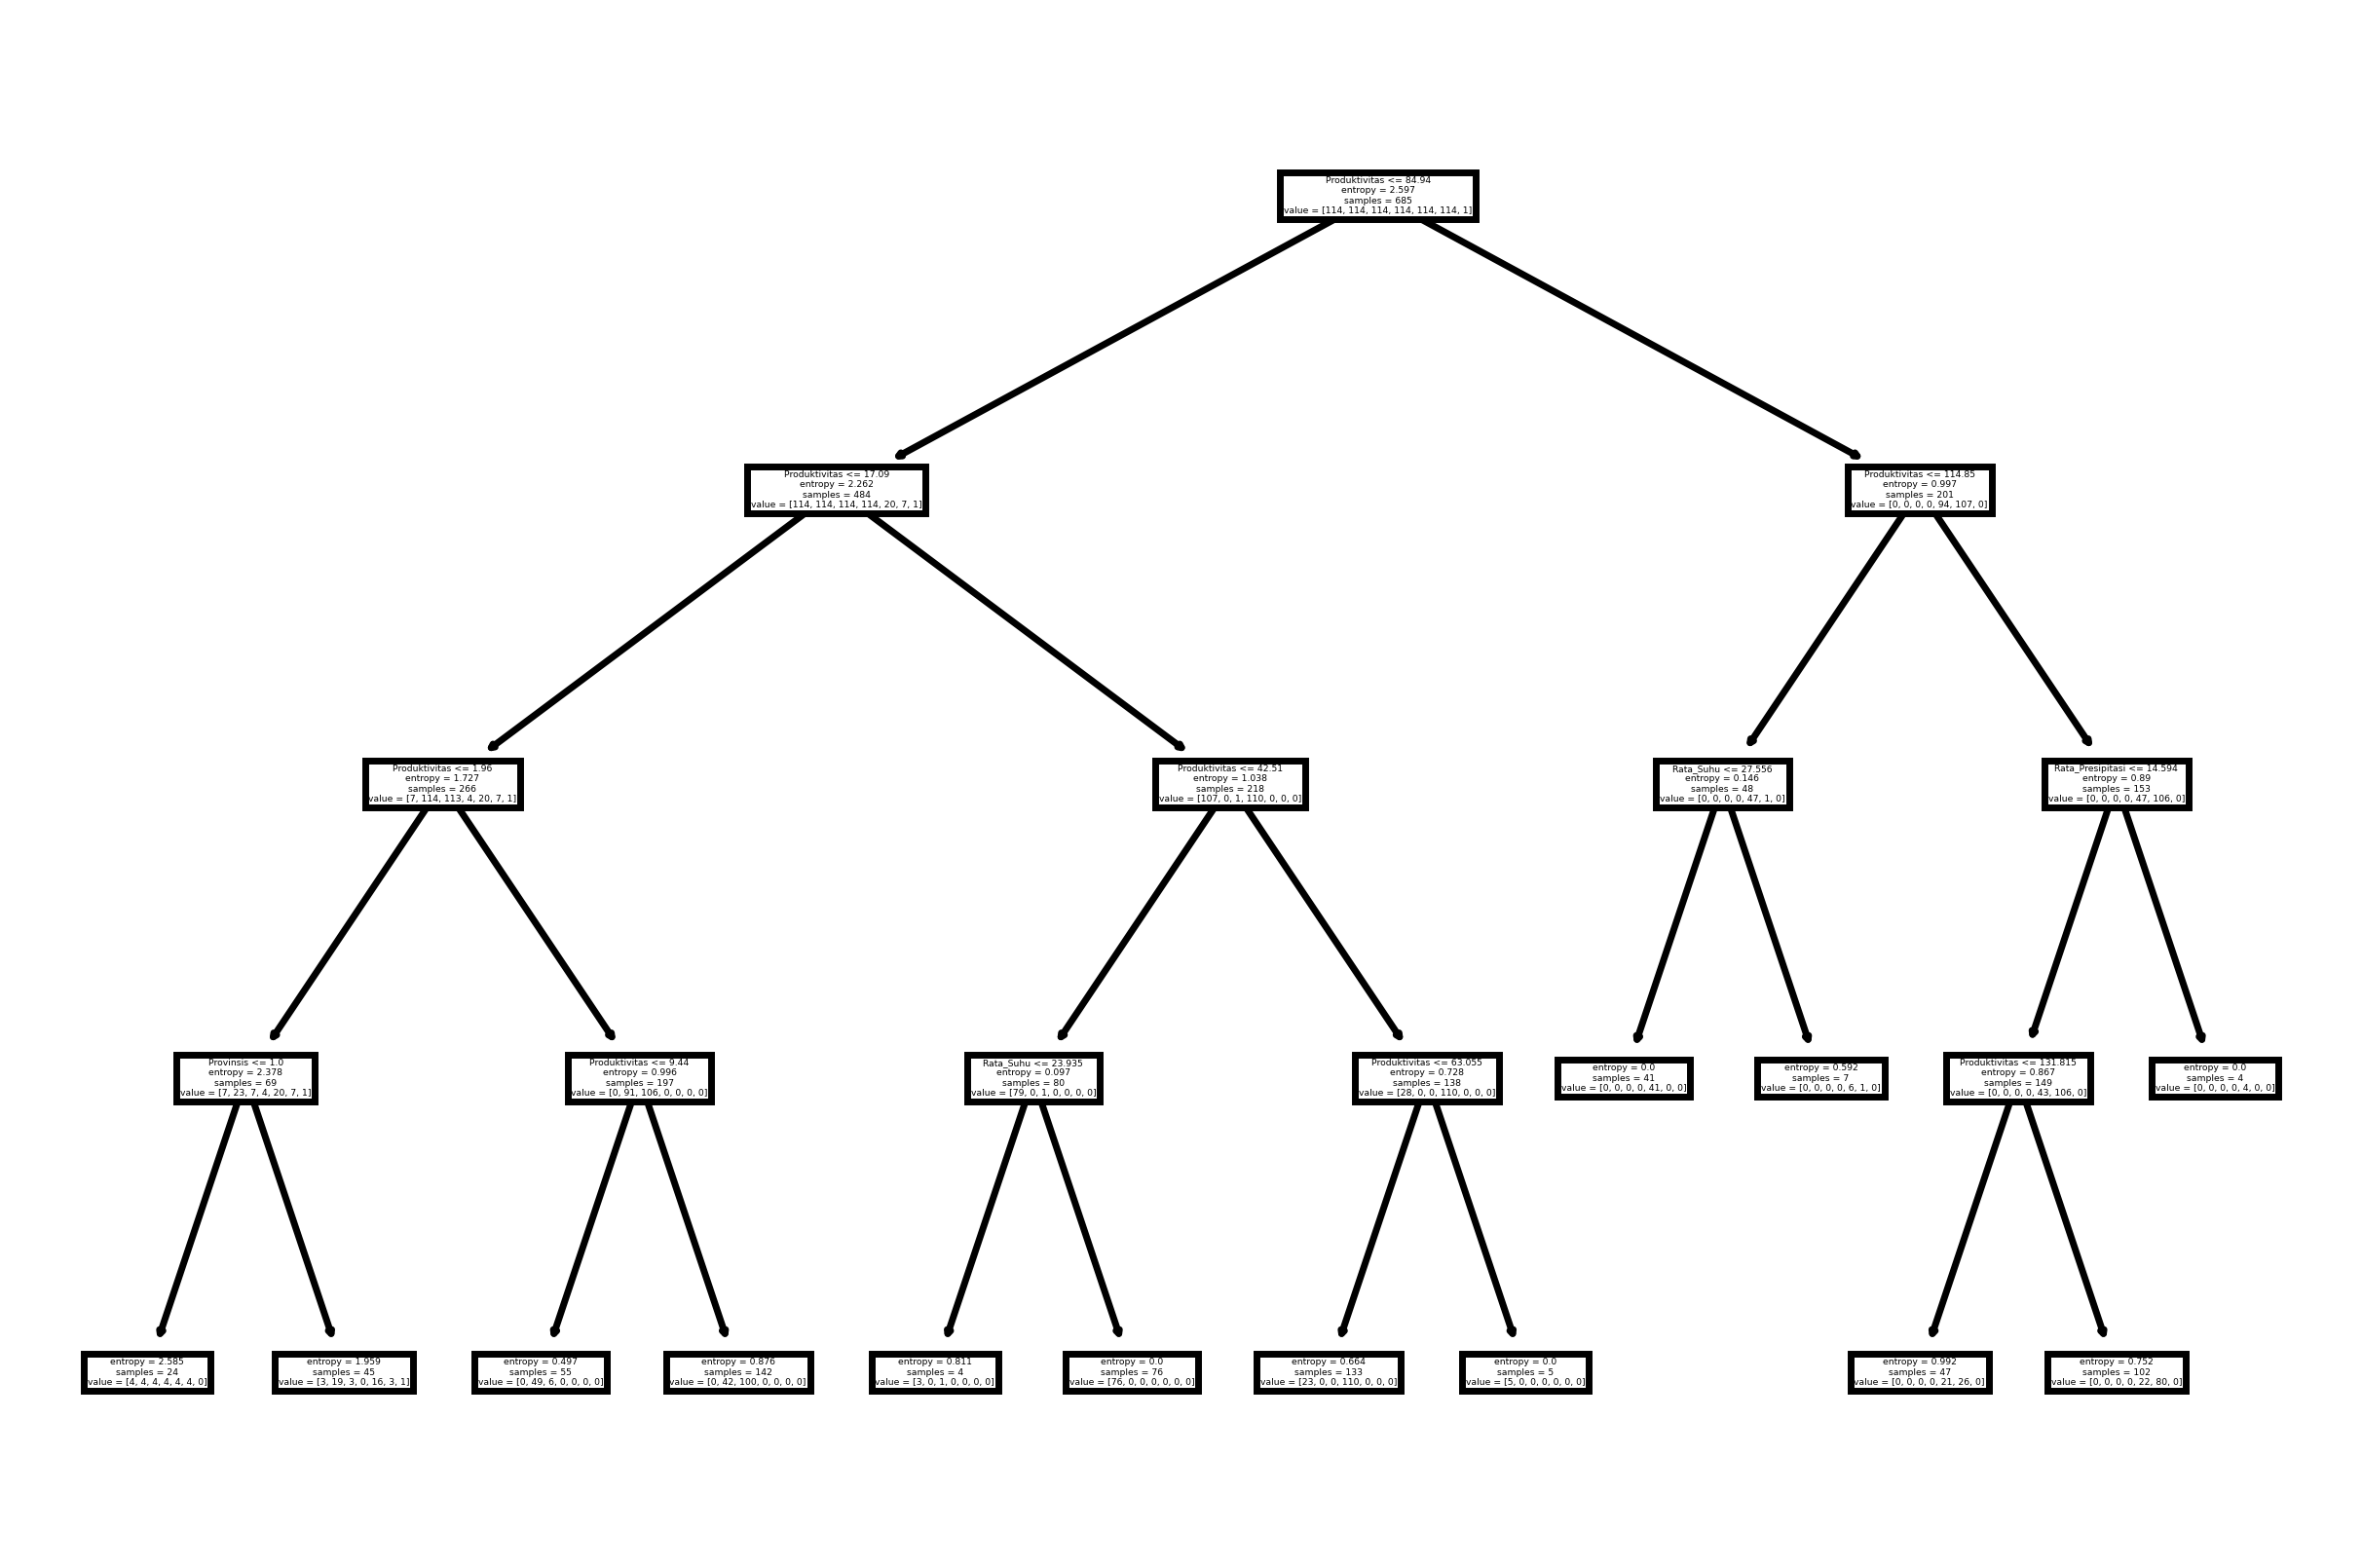

In [ ]:
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

#Penentuan Komoditas Yang harus ditanam berdasarkan decision tree
feature_cols = ['Provinsis', 'Produktivitas', 'Rata_Suhu', 'Rata_Kelembapan', 'Rata_Presipitasi'] 
X = df_yield[feature_cols] 
Y= df_yield['Komoditass']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2, random_state =100)
clf_en = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=4, min_samples_leaf=4, ccp_alpha = 0.0) 
clf_en.fit(X, Y)
mpl.rcParams["figure.dpi"] = 500 
plot_tree(clf_en, feature_names = feature_cols) 

In [ ]:
clf_en.score(X_test,Y_test)

0.8321167883211679

In [ ]:
Y_pred = clf_en.predict(X_test)
Y_pred

array([5, 0, 3, 0, 1, 4, 0, 5, 3, 3, 1, 3, 3, 0, 2, 0, 4, 0, 1, 2, 3, 3,
       0, 0, 5, 2, 1, 1, 3, 1, 5, 2, 5, 4, 1, 3, 1, 2, 0, 2, 3, 0, 5, 5,
       5, 0, 3, 3, 1, 2, 1, 0, 3, 0, 1, 5, 2, 5, 2, 3, 3, 5, 0, 5, 0, 4,
       2, 0, 1, 1, 1, 2, 3, 1, 3, 5, 4, 4, 3, 2, 5, 5, 1, 2, 3, 1, 2, 5,
       5, 3, 5, 2, 4, 4, 0, 3, 3, 5, 2, 2, 5, 4, 5, 5, 0, 5, 3, 5, 5, 5,
       3, 1, 2, 1, 5, 5, 4, 1, 5, 0, 2, 3, 4, 1, 3, 0, 5, 0, 2, 5, 0, 4,
       1, 4, 2, 3, 1])

In [ ]:
komoditas = np.array(Y_test)
predictions = np.array(Y_pred)
confusion_matrix(komoditas, predictions)

array([[19,  0,  0,  3,  0,  0],
       [ 1, 17,  6,  0,  0,  0],
       [ 0,  3, 15,  0,  0,  0],
       [ 1,  0,  0, 24,  0,  0],
       [ 1,  3,  0,  0, 13,  5],
       [ 0,  0,  0,  0,  0, 26]])

In [ ]:
tahubulat = df_yield[(df_yield['Komoditas'] == 'Padi')|(df_yield['Komoditas'] == 'Jagung')]
tahubulat2=  df_yield[(df_yield['Komoditas'] == 'Ubi Jalar')|(df_yield['Komoditas'] == 'Ubi Kayu')]

In [ ]:
tahuphil = pd.read_csv('decisiontree.csv')
tahuphil

FileNotFoundError: ignored

In [ ]:
col_names = tahuphil.rename(index = str, columns = {'1' : 'Provinsi', '3' : 'Produktivitas', '1.1' : 'Suhu', '1.2' : 'Kelembaban', '1.3' : 'Presipitasi', '1.4' : 'Keputusan'})
col_names

NameError: ignored

In [ ]:
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

#Penentuan Komoditas Yang harus ditanam berdasarkan decision tree
feature_cols = ['Provinsi', 'Produktivitas', 'Suhu', 'Kelembaban', 'Presipitasi'] 
X = col_names[feature_cols] 
Y = col_names['Keputusan']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.15, random_state =100)
clf_en1 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth=3, min_samples_leaf=2, ccp_alpha = 0.0) 
clf_en1.fit(X, Y)
mpl.rcParams["figure.dpi"] = 500 
plot_tree(clf_en, feature_names = feature_cols) 

NameError: ignored

In [ ]:
clf_en1.score(X_test,Y_test)

NameError: ignored

In [ ]:
clf_en1.predict(X_test)

NameError: ignored

In [ ]:
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

#Penentuan Komoditas Yang harus ditanam berdasarkan decision tree
feature_cols = ['Provinsi', 'Produktivitas', 'Suhu', 'Kelembaban', 'Presipitasi'] 
X = col_names[feature_cols] 
Y = col_names['Keputusan']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.2, random_state =100)
clf_en = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth=5, min_samples_leaf=2, ccp_alpha = 0.0) 
clf_en.fit(X, Y)
mpl.rcParams["figure.dpi"] = 500 
plot_tree(clf_en, feature_names = feature_cols) 

NameError: ignored

In [ ]:
clf_en.score(X_test, Y_test)

0.8321167883211679

In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 100))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

print(accuracy)

[0.32116788321167883, 0.5693430656934306, 0.8248175182481752, 0.8175182481751825, 0.7956204379562044, 0.8029197080291971, 0.7883211678832117, 0.7299270072992701, 0.7007299270072993, 0.6715328467153284, 0.7007299270072993, 0.6715328467153284, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211, 0.6788321167883211

In [ ]:
clf.predict(X_test)

array([5, 0, 3, 0, 2, 4, 0, 5, 0, 3, 4, 3, 3, 0, 1, 0, 4, 0, 1, 2, 0, 3,
       0, 0, 5, 2, 4, 1, 3, 2, 5, 2, 4, 4, 1, 3, 6, 2, 0, 1, 0, 0, 4, 5,
       4, 0, 3, 3, 1, 1, 1, 4, 3, 0, 1, 5, 1, 5, 2, 0, 0, 5, 0, 4, 0, 4,
       2, 0, 1, 1, 4, 2, 3, 1, 3, 4, 4, 4, 3, 2, 4, 5, 1, 1, 0, 1, 2, 5,
       4, 3, 5, 2, 4, 4, 0, 0, 3, 5, 1, 2, 5, 4, 5, 4, 4, 4, 3, 4, 5, 5,
       3, 4, 2, 1, 4, 5, 4, 1, 5, 0, 1, 3, 4, 1, 3, 3, 4, 0, 2, 4, 0, 4,
       2, 4, 2, 3, 1])

In [ ]:
#Analisis Data Kedua
df_yield

,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Komoditass,Provinsis
0,BANTEN,Jagung,1997,0.00,87.402258,9.029355,25.262903,0,0
1,BANTEN,Kacang Hijau,1997,0.00,84.525806,4.444516,26.269677,1,0
2,BANTEN,Kacang Tanah,1997,0.00,84.624516,6.178065,26.580000,2,0
3,BANTEN,Padi,1997,0.00,77.869032,0.349032,25.261290,3,0
4,BANTEN,Ubi Jalar,1997,0.00,74.951290,0.299677,25.473548,4,0
...,...,...,...,...,...,...,...,...,...
680,JAWA TIMUR,Kacang Hijau,2015,12.07,59.050968,0.004194,27.409677,1,5
681,JAWA TIMUR,Kacang Tanah,2015,13.73,55.447000,0.029333,28.772333,2,5
682,JAWA TIMUR,Padi,2015,61.13,60.052903,1.374194,29.809355,3,5
683,JAWA TIMUR,Ubi Jalar,2015,274.23,88.217097,15.854839,26.354194,4,5


In [ ]:
df_yield.groupby('Komoditas').count()

,Provinsi,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Komoditass,Provinsis
Komoditas,,,,,,,,
Jagung,114,114,114,114,114,114,114,114
Kacang Hijau,114,114,114,114,114,114,114,114
Kacang Tanah,114,114,114,114,114,114,114,114
Kedelai,1,1,1,1,1,1,1,1
Padi,114,114,114,114,114,114,114,114
Ubi Jalar,114,114,114,114,114,114,114,114
Ubi Kayu,114,114,114,114,114,114,114,114


In [ ]:
df_yield.describe()

,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Komoditass,Provinsis
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,2005.986861,59.484438,79.530767,4.581061,26.074550,2.505109,2.499270
std,5.488009,60.914650,7.340686,4.131277,1.380327,1.713053,1.707932
min,1997.000000,0.000000,54.159355,0.000333,21.914839,0.000000,0.000000
25%,2001.000000,10.720000,76.137667,0.980000,25.549355,1.000000,1.000000
50%,2006.000000,41.800000,80.782581,3.646774,26.278387,3.000000,2.000000
75%,2011.000000,109.000000,85.213548,7.436129,26.881290,4.000000,4.000000
max,2015.000000,288.810000,90.638065,22.534516,30.139032,6.000000,5.000000


In [ ]:
#Menunjukkan Produktivitas Provinsi Tertinggi

df_yield.groupby(['Provinsi'],sort=True)['Produktivitas'].sum().nlargest(7)

Provinsi
JAWA TENGAH      8411.81
JAWA BARAT       8345.83
JAWA TIMUR       8086.13
DI YOGYAKARTA    6816.19
BANTEN           5478.56
DKI JAKARTA      3608.32
Name: Produktivitas, dtype: float64

In [ ]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

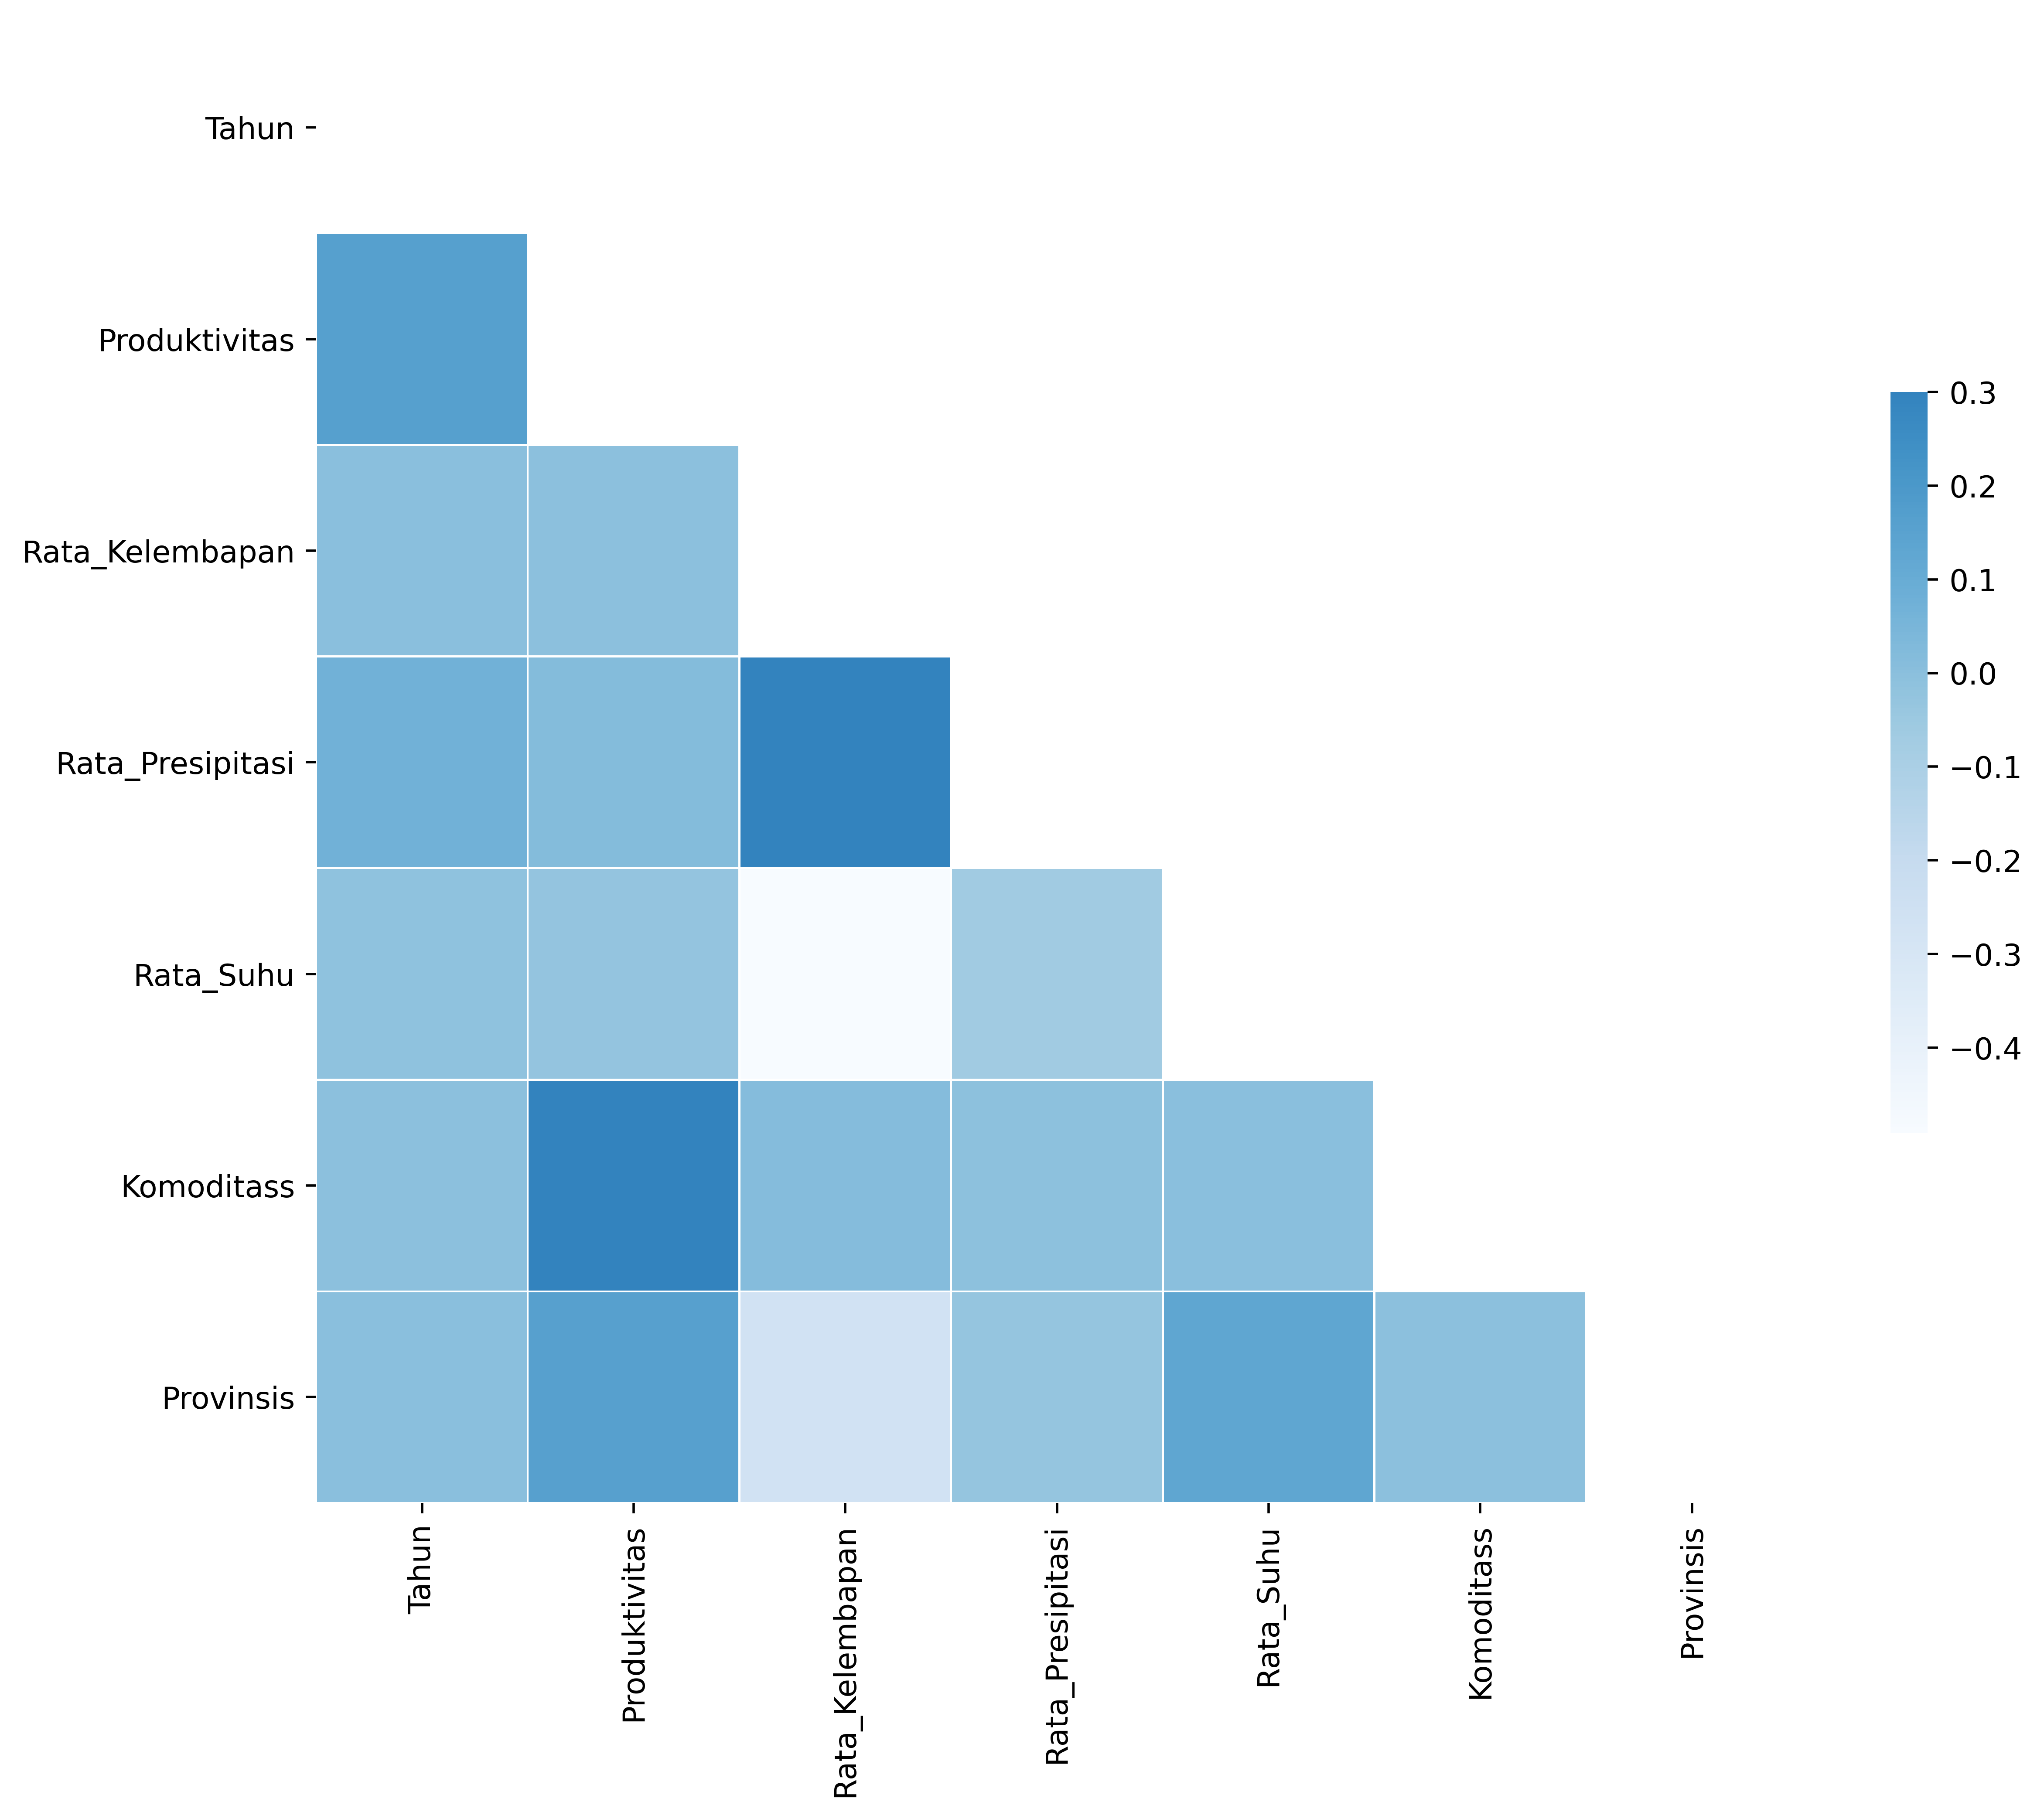

In [ ]:
#Korelasi masing- masing parameter satu yang lain

correlation_data=df_yield.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="Blues"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0.09,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
#Part Three :  Data Preprocessing

df_yield.head()

,Provinsi,Komoditas,Tahun,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Komoditass,Provinsis
0,BANTEN,Jagung,1997,0.0,87.402258,9.029355,25.262903,0,0
1,BANTEN,Kacang Hijau,1997,0.0,84.525806,4.444516,26.269677,1,0
2,BANTEN,Kacang Tanah,1997,0.0,84.624516,6.178065,26.580000,2,0
3,BANTEN,Padi,1997,0.0,77.869032,0.349032,25.261290,3,0
4,BANTEN,Ubi Jalar,1997,0.0,74.951290,0.299677,25.473548,4,0


In [ ]:
#Encoding Categorical Variables:

from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_yield_onehot = pd.get_dummies(df_yield, columns=['Provinsi',"Komoditas"], prefix = ['Area',"Komoditas"])
features=df_yield_onehot.loc[:, df_yield_onehot.columns != 'Produktivitas']
label=df_yield['Produktivitas']
features.head()

,Tahun,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Komoditass,Provinsis,Area_BANTEN,Area_DI YOGYAKARTA,Area_DKI JAKARTA,Area_JAWA BARAT,Area_JAWA TENGAH,Area_JAWA TIMUR,Komoditas_Jagung,Komoditas_Kacang Hijau,Komoditas_Kacang Tanah,Komoditas_Kedelai,Komoditas_Padi,Komoditas_Ubi Jalar,Komoditas_Ubi Kayu
0,1997,87.402258,9.029355,25.262903,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1997,84.525806,4.444516,26.269677,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1997,84.624516,6.178065,26.580000,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,1997,77.869032,0.349032,25.261290,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,1997,74.951290,0.299677,25.473548,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
features = features.drop(['Tahun'] , axis=1)

In [ ]:
features.head()

,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Komoditass,Provinsis,Area_BANTEN,Area_DI YOGYAKARTA,Area_DKI JAKARTA,Area_JAWA BARAT,Area_JAWA TENGAH,Area_JAWA TIMUR,Komoditas_Jagung,Komoditas_Kacang Hijau,Komoditas_Kacang Tanah,Komoditas_Kedelai,Komoditas_Padi,Komoditas_Ubi Jalar,Komoditas_Ubi Kayu
0,87.402258,9.029355,25.262903,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,84.525806,4.444516,26.269677,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,84.624516,6.178065,26.580000,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,77.869032,0.349032,25.261290,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,74.951290,0.299677,25.473548,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Scaling Features

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [ ]:
features

array([[0.91129603, 0.40068112, 0.40709943, ..., 0.        , 0.        ,
        0.        ],
       [0.83244314, 0.19721961, 0.52951559, ..., 0.        , 0.        ,
        0.        ],
       [0.83514909, 0.27414933, 0.56724848, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16156132, 0.06096783, 0.95991371, ..., 1.        , 0.        ,
        0.        ],
       [0.93363341, 0.70357579, 0.53979212, ..., 0.        , 1.        ,
        0.        ],
       [0.82682784, 0.55226445, 0.63012355, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Training Data


from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [ ]:
# Model Comparison

from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [ ]:
model_train=list(map(compare_models,models))

In [ ]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8535490498578672]
['RandomForestRegressor', 0.8383646362431113]
['SVR', 0.3158220827823097]
['DecisionTreeRegressor', 0.7555474544765424]


In [ ]:
df_yield_onehot = df_yield_onehot.drop(['Tahun'], axis=1)

In [ ]:
df_yield_onehot.head()

,Produktivitas,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Komoditass,Provinsis,Area_BANTEN,Area_DI YOGYAKARTA,Area_DKI JAKARTA,Area_JAWA BARAT,Area_JAWA TENGAH,Area_JAWA TIMUR,Komoditas_Jagung,Komoditas_Kacang Hijau,Komoditas_Kacang Tanah,Komoditas_Kedelai,Komoditas_Padi,Komoditas_Ubi Jalar,Komoditas_Ubi Kayu
0,0.0,87.402258,9.029355,25.262903,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0.0,84.525806,4.444516,26.269677,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.0,84.624516,6.178065,26.580000,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0.0,77.869032,0.349032,25.261290,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.0,74.951290,0.299677,25.473548,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
#setting test data to columns from dataframe and excluding 'hg/ha_yield' values where ML model should be predicting 

test_df=pd.DataFrame(test_data,columns=df_yield_onehot.loc[:, df_yield_onehot.columns != 'Produktivitas'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Area' in col]].stack()[test_df[[col for col in test_df.columns if 'Area' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
areas=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Komoditas' in col]].stack()[test_df[[col for col in test_df.columns if 'Komoditas' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
komoditass=[i.split("_")[1] for i in itmlist]

IndexError: ignored

In [ ]:
test_df.head()

,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Komoditass,Provinsis,Area_BANTEN,Area_DI YOGYAKARTA,Area_DKI JAKARTA,Area_JAWA BARAT,Area_JAWA TENGAH,Area_JAWA TIMUR,Komoditas_Jagung,Komoditas_Kacang Hijau,Komoditas_Kacang Tanah,Komoditas_Kedelai,Komoditas_Padi,Komoditas_Ubi Jalar,Komoditas_Ubi Kayu
0,0.856974,0.026740,0.413179,0.833333,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.596999,0.007100,0.492449,0.666667,0.8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.834539,0.406965,0.517631,0.500000,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.819391,0.214655,0.506217,0.500000,0.4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.896802,0.469652,0.538615,0.333333,0.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.drop([col for col in test_df.columns if 'Komoditas' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Area' in col],axis=1,inplace=True)
test_df.head()

,Rata_Kelembapan,Rata_Presipitasi,Rata_Suhu,Provinsis
0,0.856974,0.026740,0.413179,0.4
1,0.596999,0.007100,0.492449,0.8
2,0.834539,0.406965,0.517631,0.2
3,0.819391,0.214655,0.506217,0.4
4,0.896802,0.469652,0.538615,0.2


In [ ]:
test_df['Area']=areas
test_df['Komoditas']=komoditass
test_df.head()

NameError: ignored

In [ ]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["Produktivitas"].tolist()
test_group=test_df.groupby("Komoditas")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

KeyError: ignored

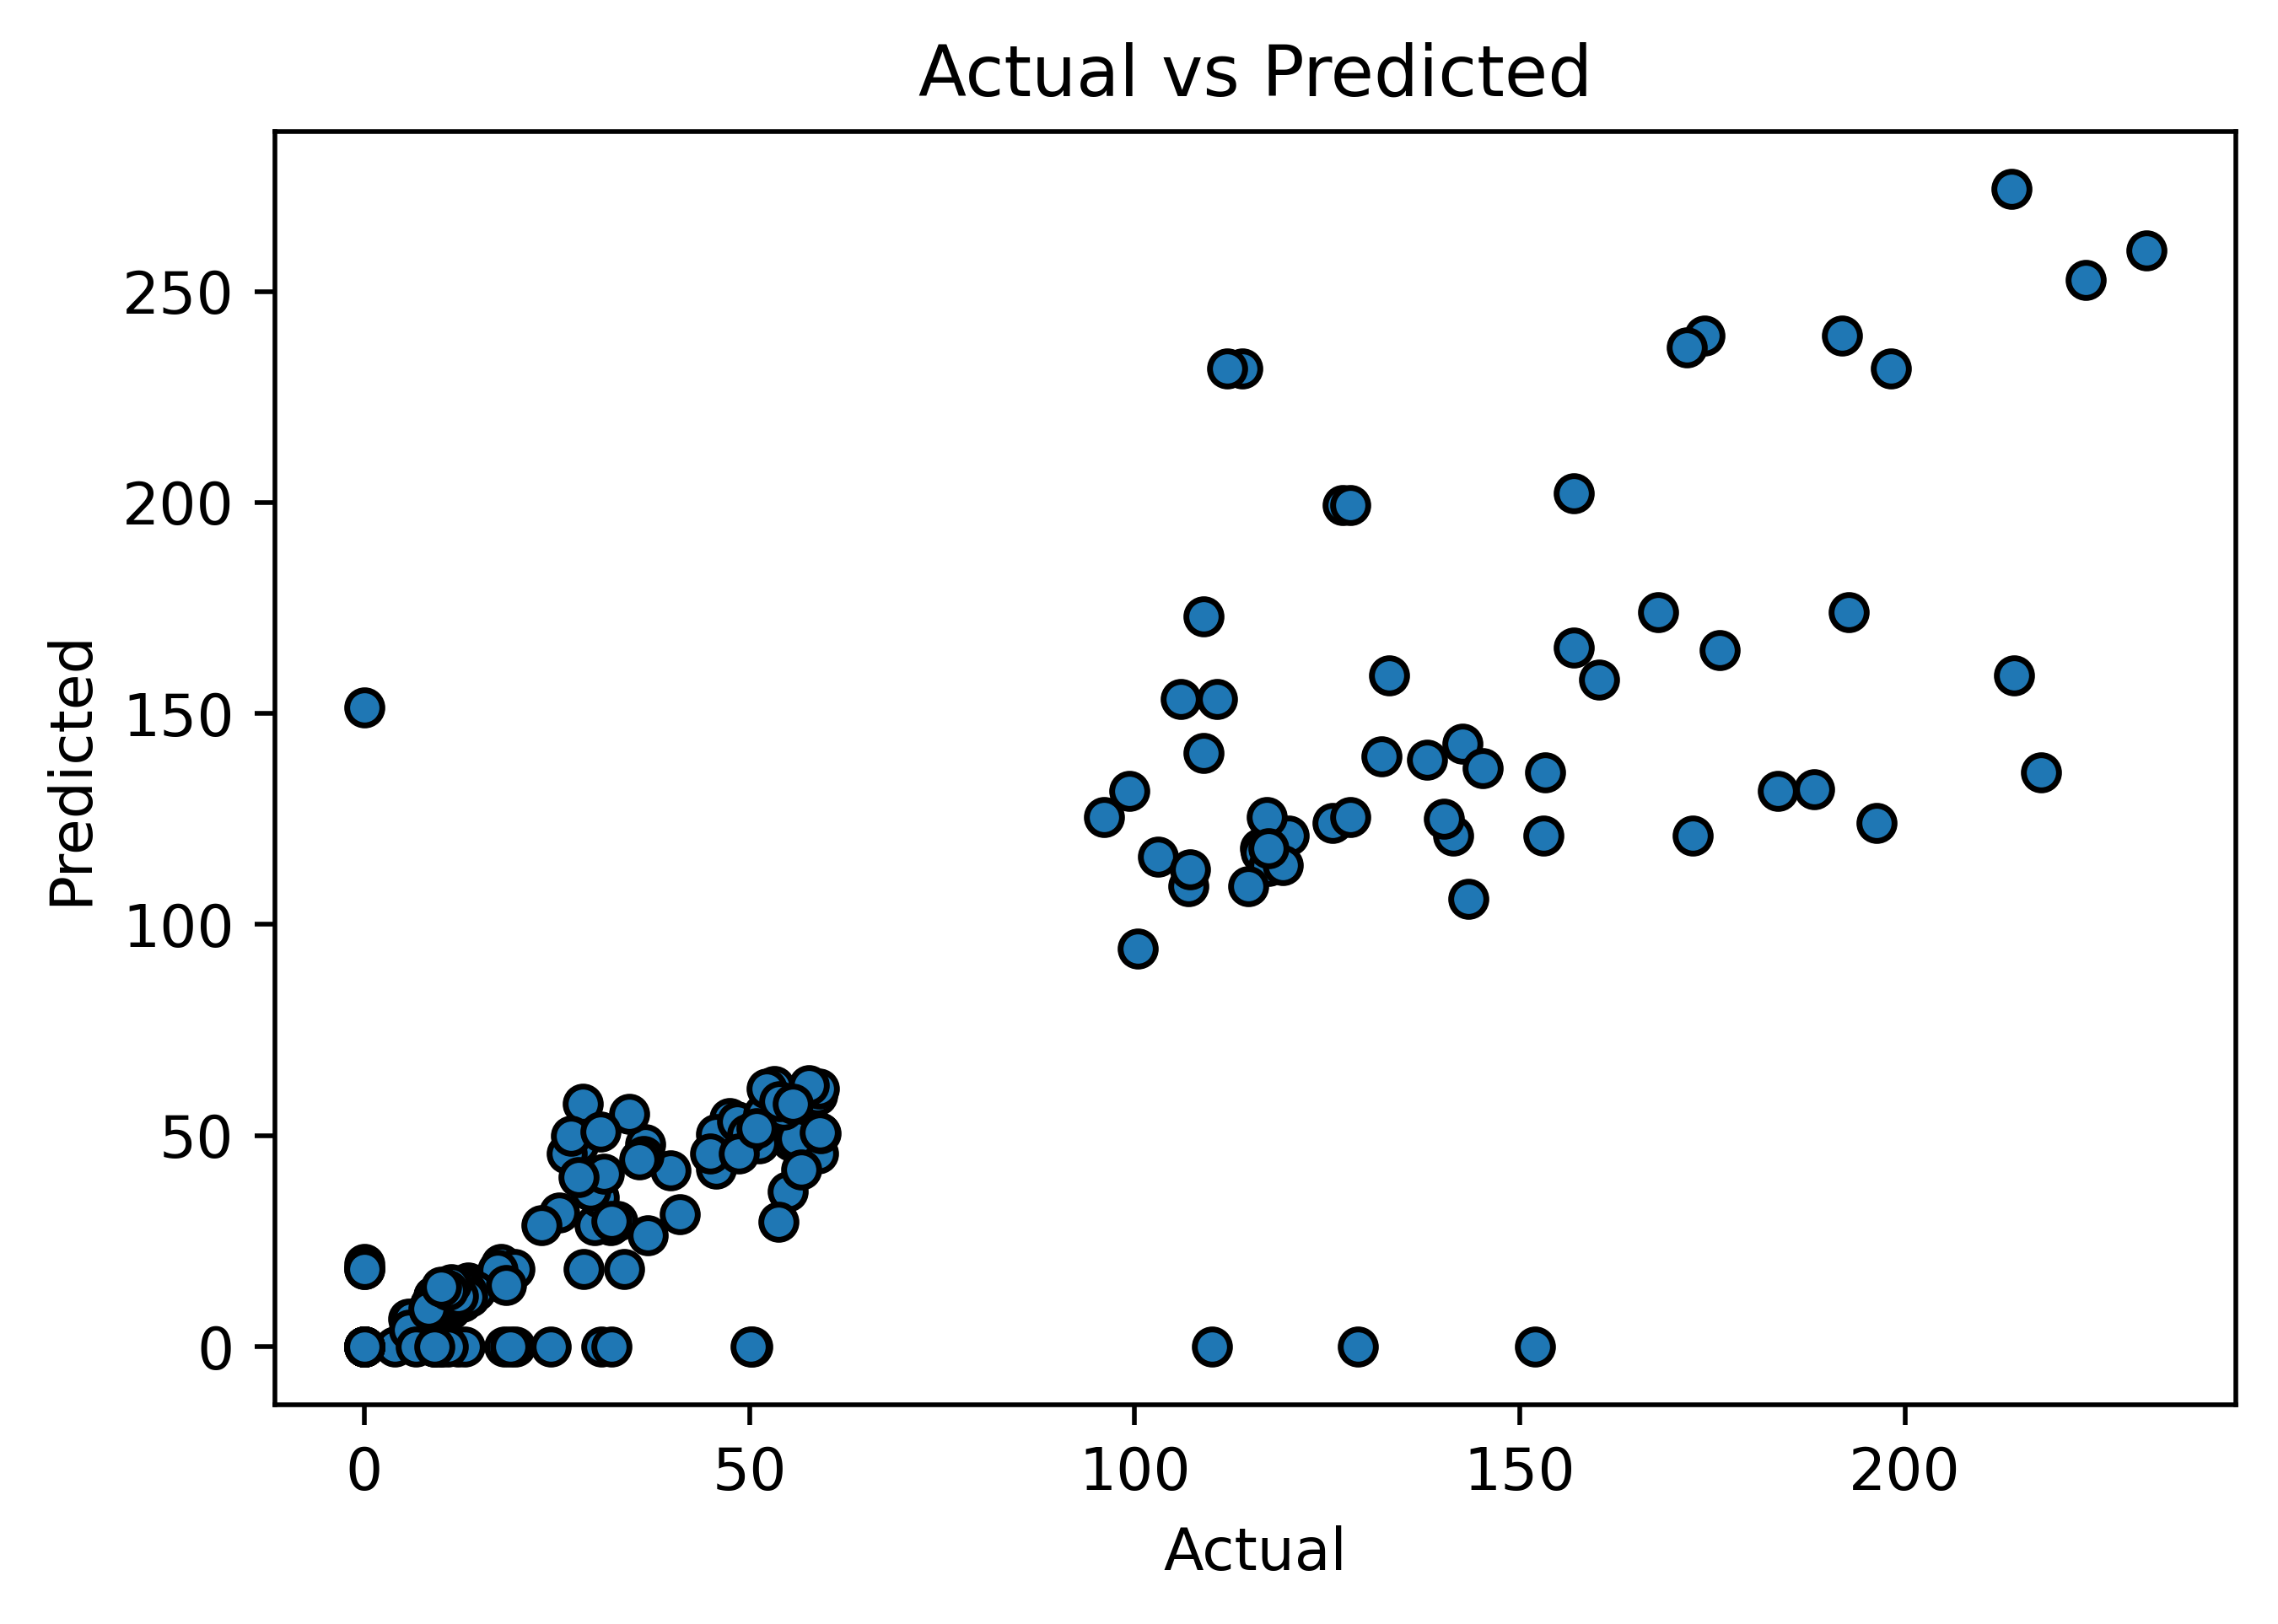

In [ ]:
# Dilakukan Prediksi

fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [ ]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

NameError: ignored

In [ ]:
#Model Results & Conclussions


varimp= {'imp':model.feature_importances_,'names':df_yield_onehot.columns[df_yield_onehot.columns!="Produktivitas"]}


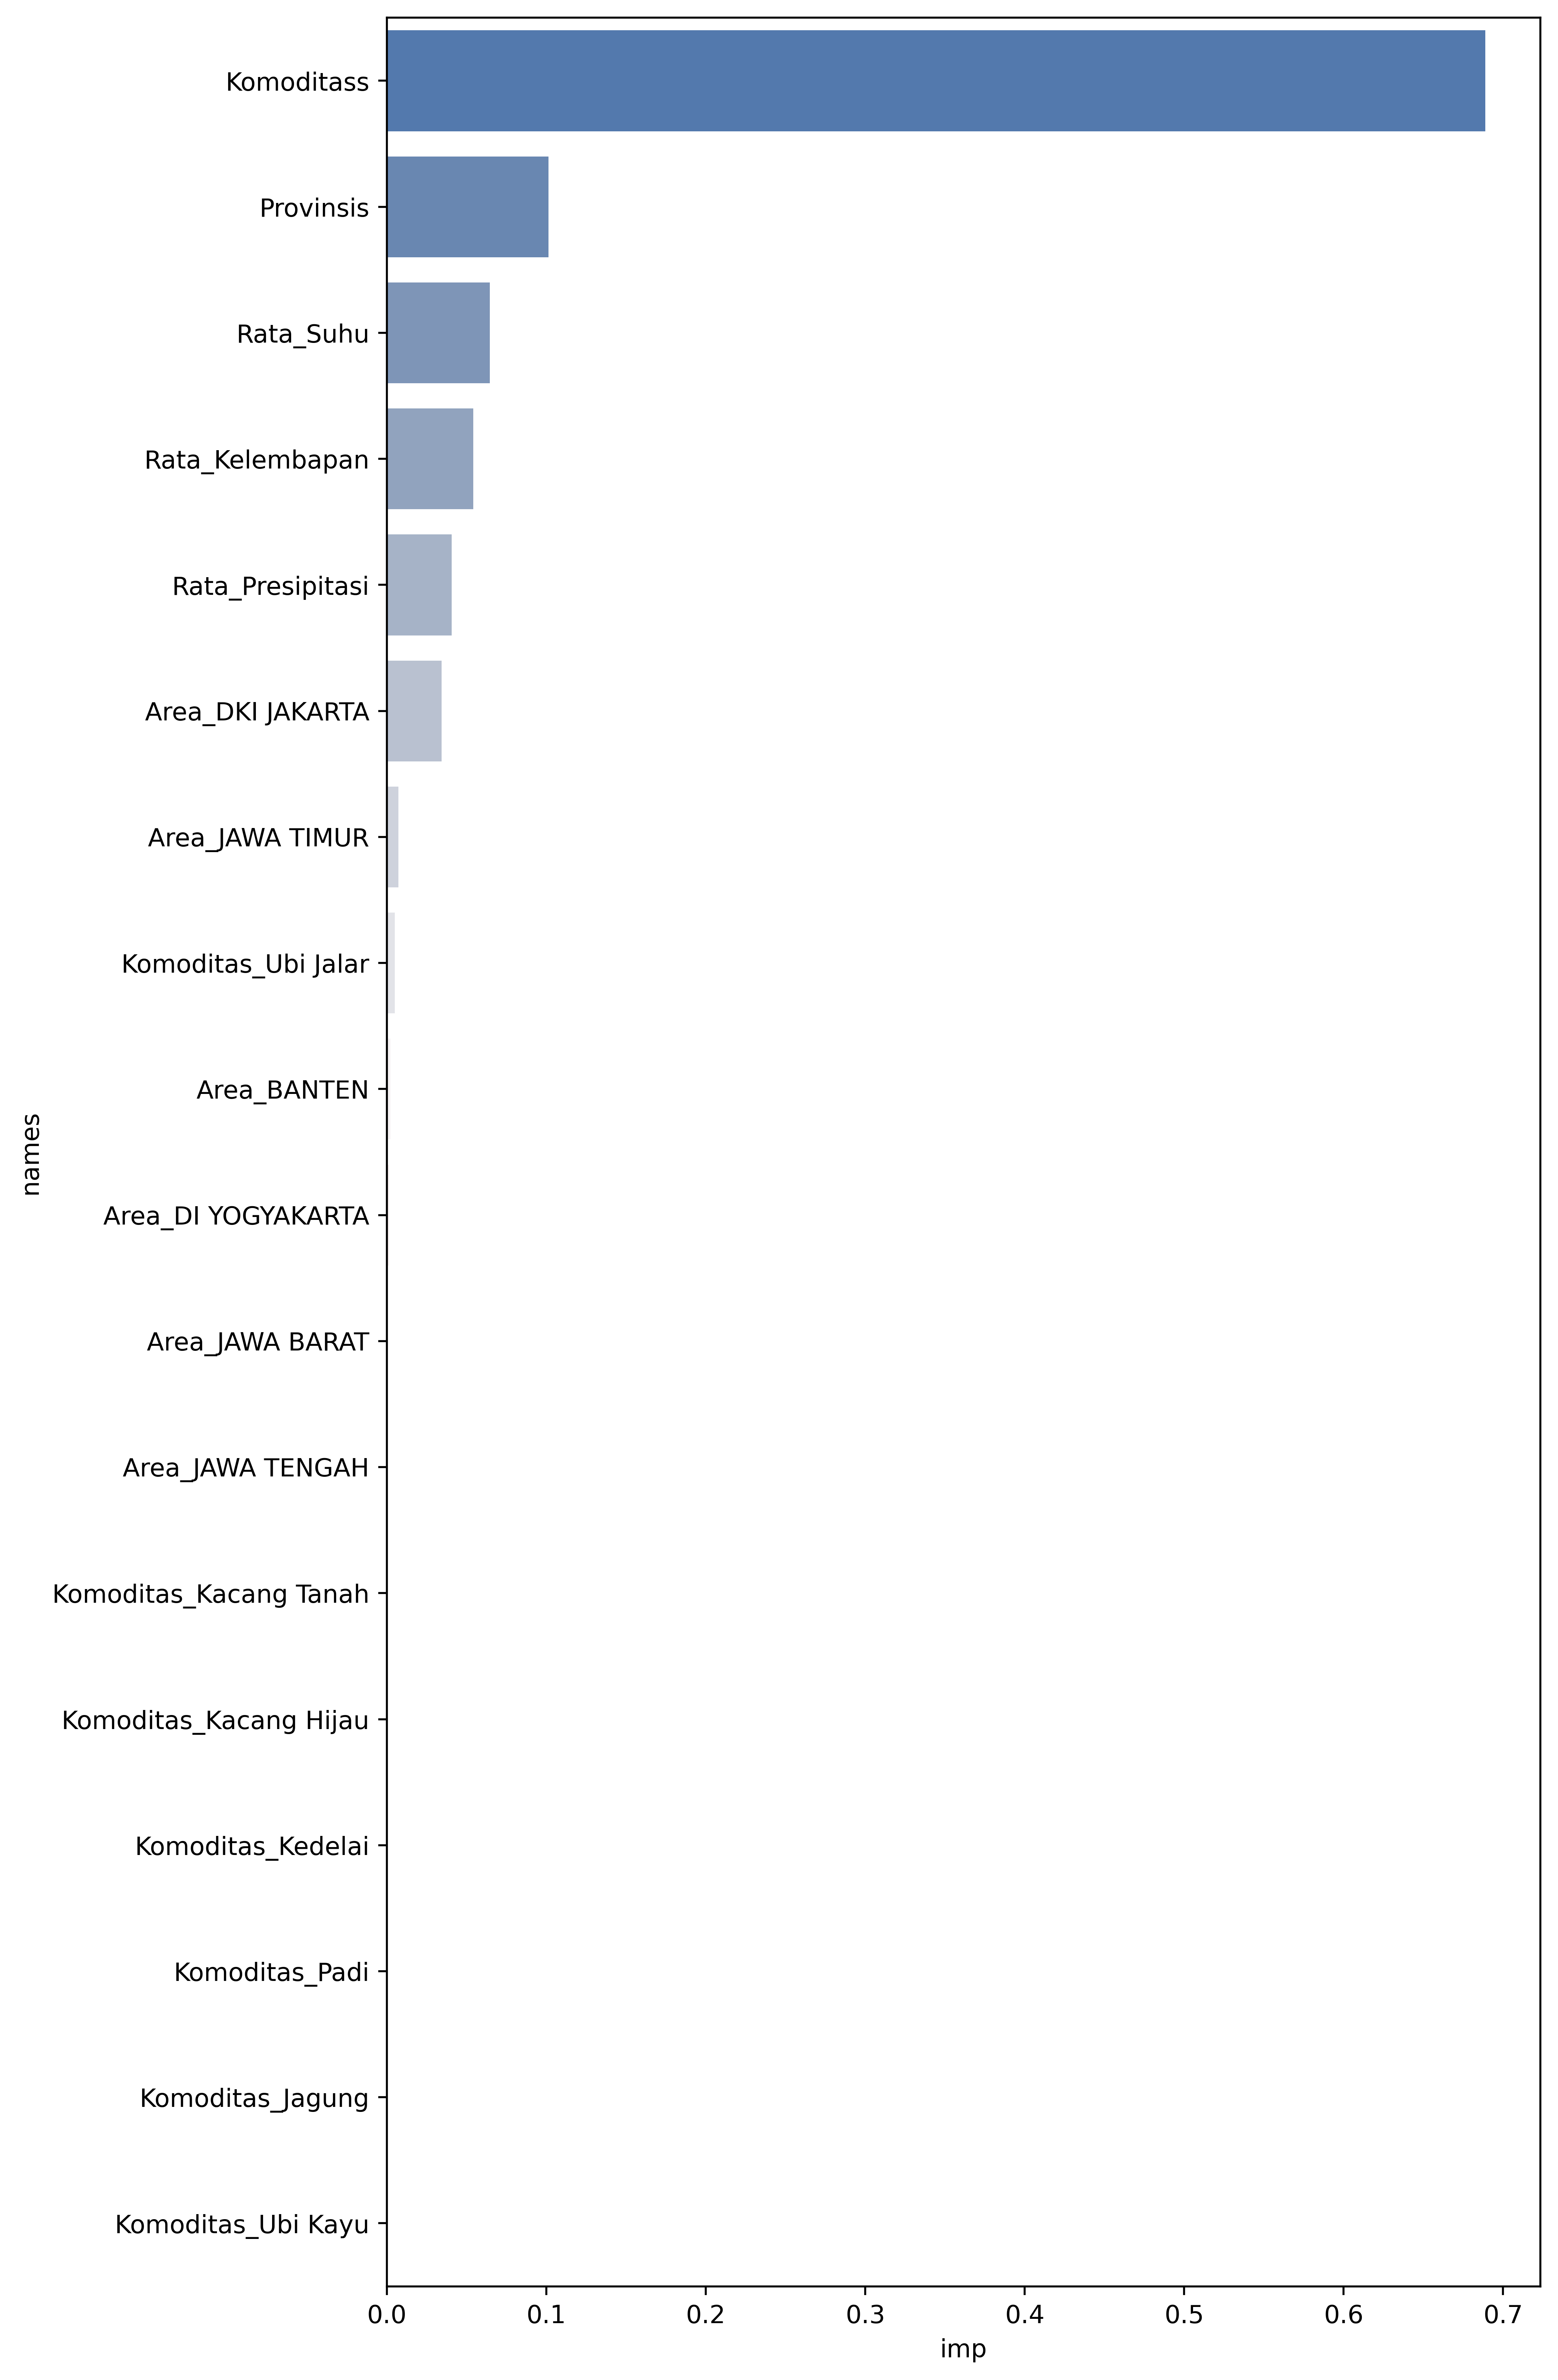

In [ ]:
a4_dims = (8.27,16.7)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

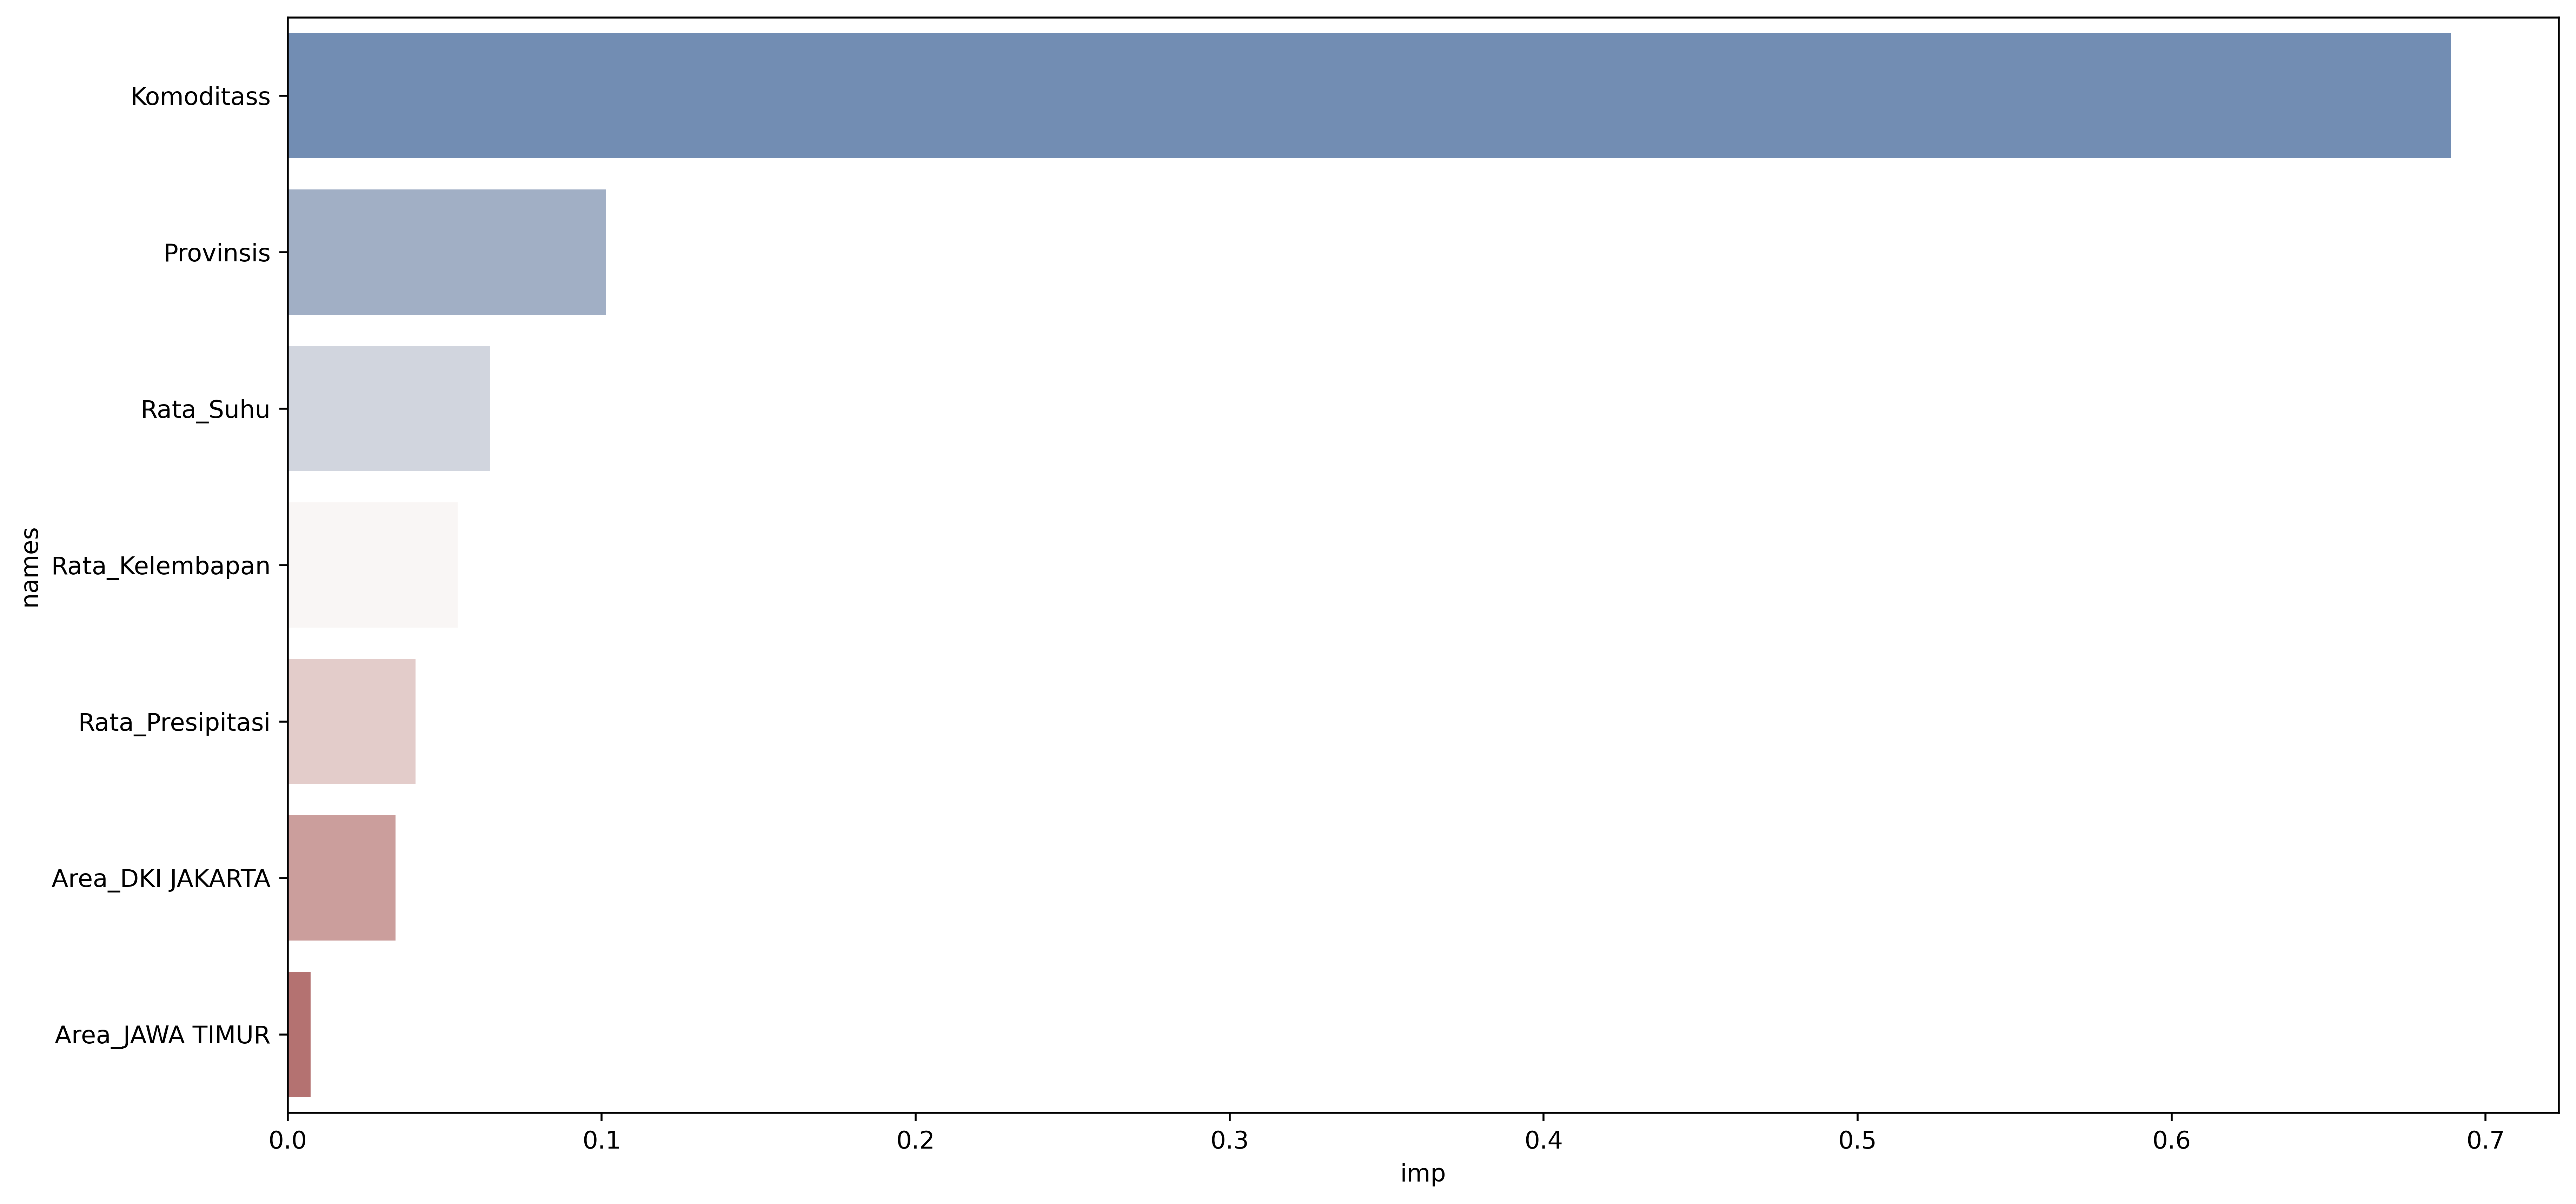

In [ ]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax)

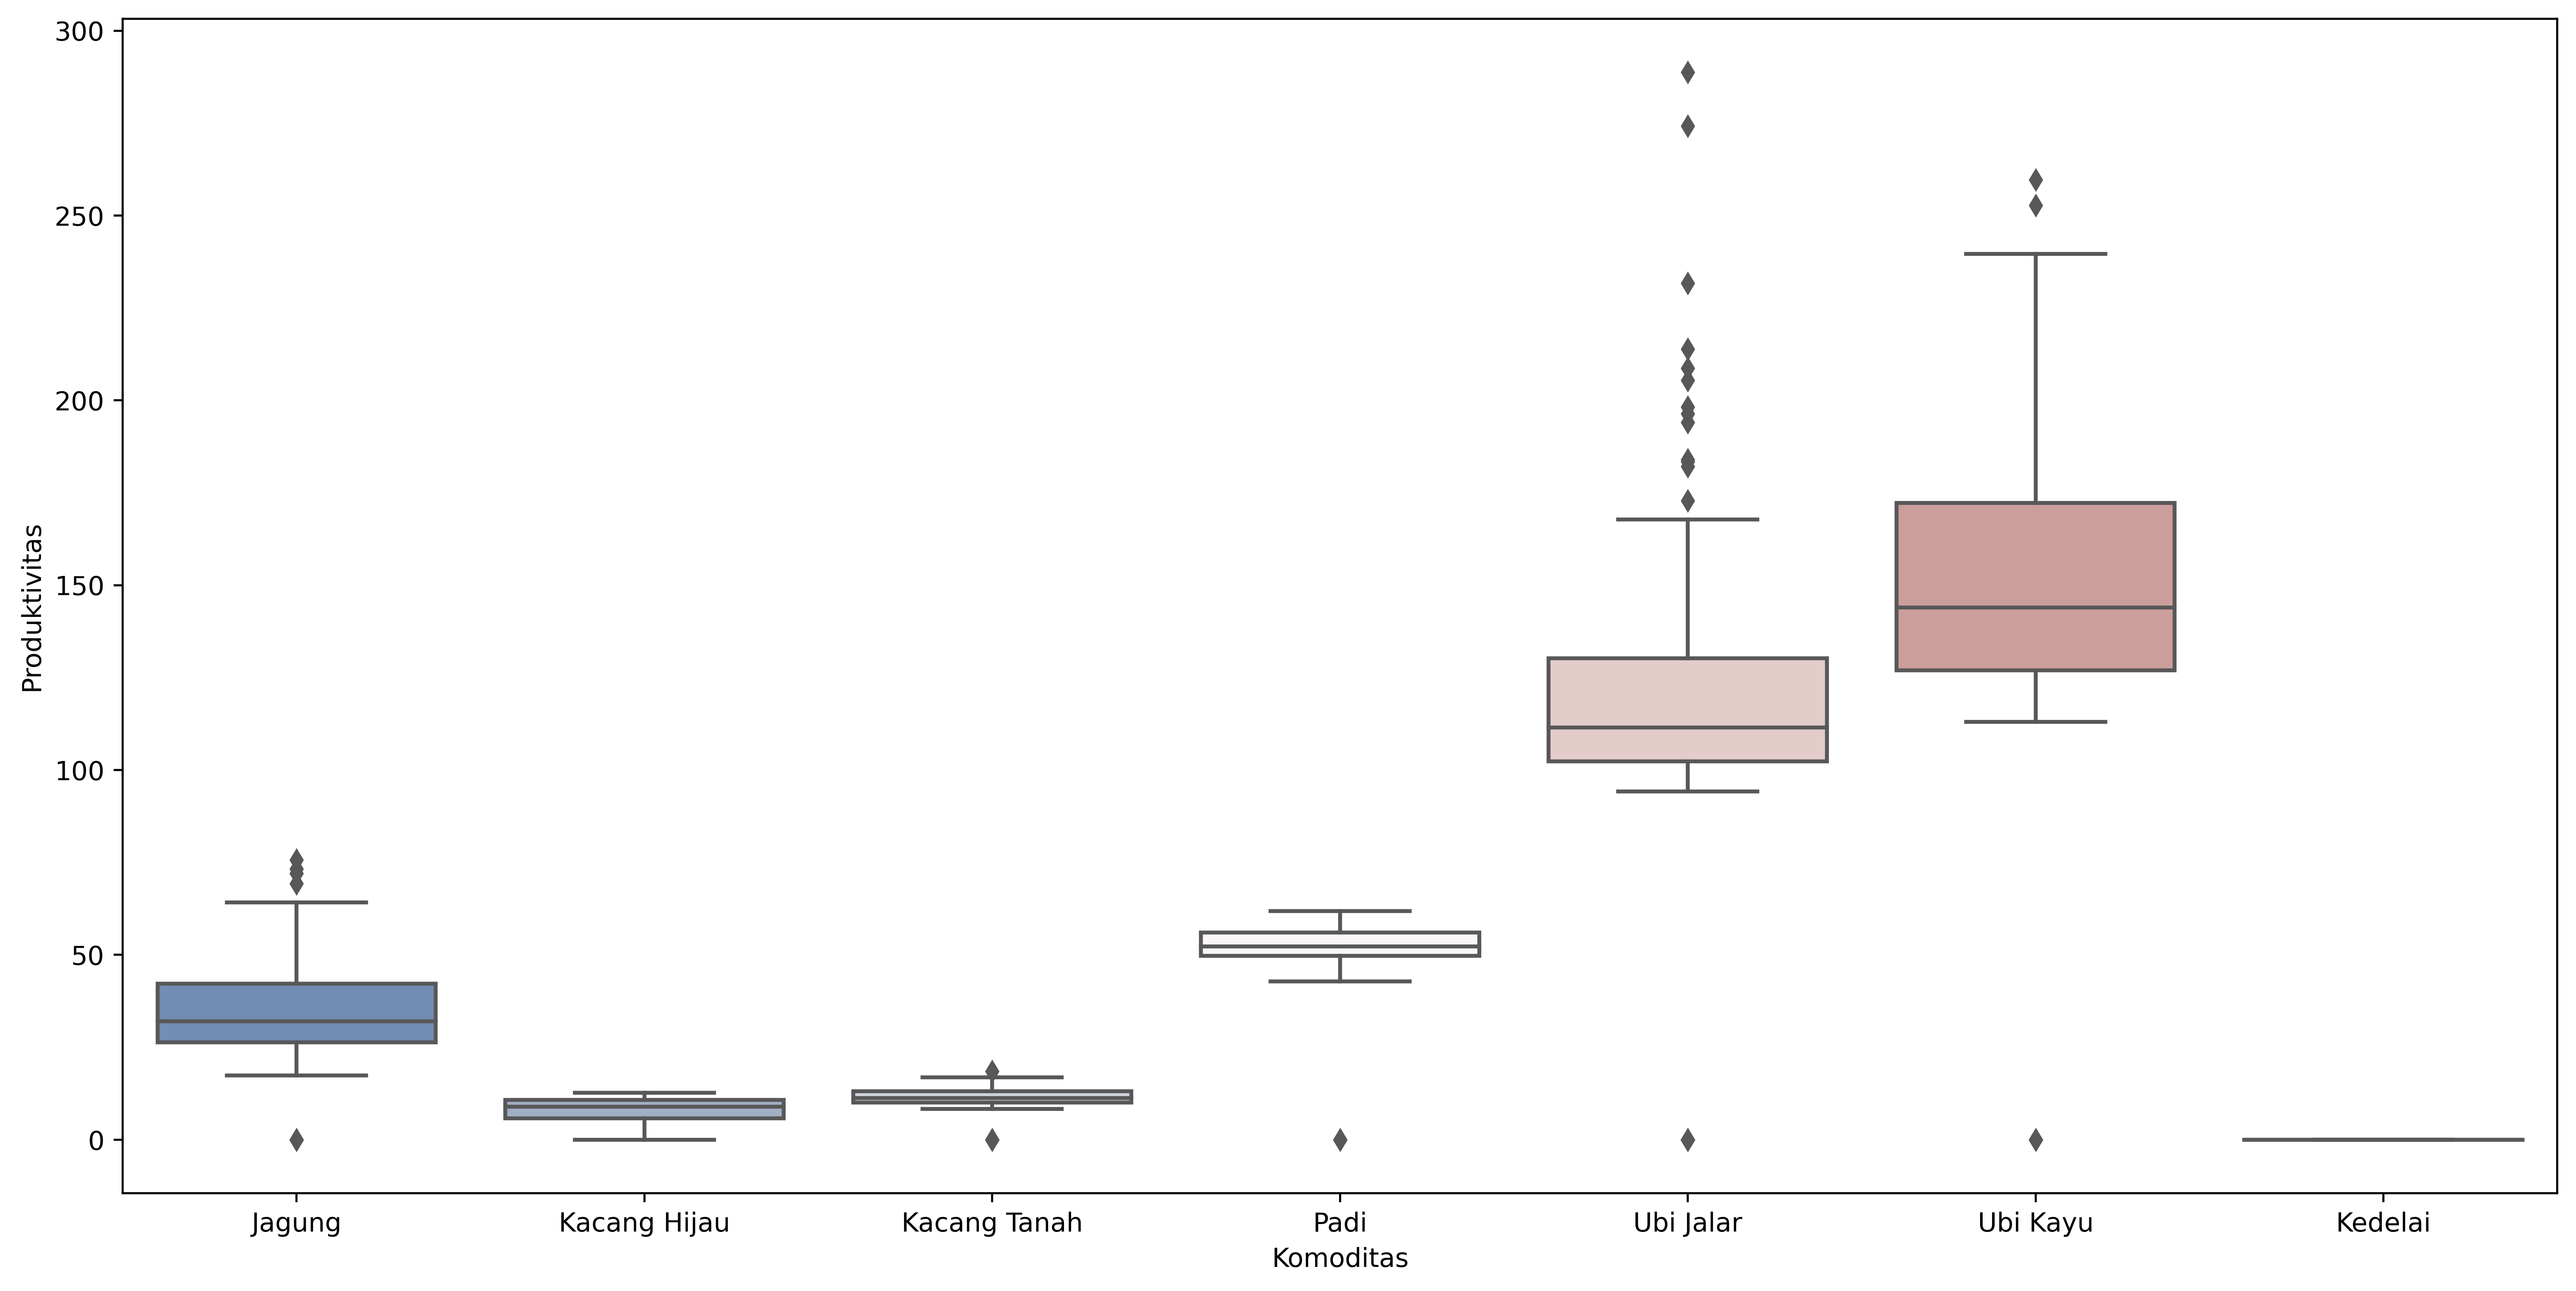

In [ ]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Komoditas",y="Produktivitas",palette="vlag",data=df_yield,ax=ax);